## NLP y Visualizaciones @Infonavit

### Objetivos:
    - Aprender qué visualizaciones podemos realizar de nuestros procesamientos de lenguaje natural
 
---
    
### Desarrollo:

In [31]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_csv('../../Prototype/datos/tweets_Infonavit_es.csv')

df.head()

,texts_Infonavit,texts_Infonavit.1
0,conferenciapresidenteel director del infonavit...,conference president the director of the infon...
1,este ano infonavit ha entregadomil creditos pa...,this year infonavit has delivered a thousand c...
2,este ano infonavit ha entregadomil creditos pa...,this year infonavit has delivered a thousand c...
3,en la conferencia matutina el secretario meyer...,at the morning conference the secretary meyerf...
4,atendemos el rezago de vivienda producto del n...,We address the housing backwardness product of...


In [33]:
es_stop_words = ['de', 'el', 'que', 'la', 'en', 'los', 'para', 'del', 'con', 'a', 'y', 'no', 'por', 'se', 'es', 'una', 'un',
                'me', 'mi', 'las', 'al', 'si', 'mas', 'tu', 'como', 'ya', 'lo', 'su', 'te', 'esta', 'o', 'donde', 'cuando',
                'tengo', 'pero', 'ha', 'sin', 'son', 'les', 'yo', 'tus', 'todos', 'nos', 'sobre', 'este', 'esto', 'hola',
                'sus', 'han', 'estan', 'cual', 'meyerfalcon', 'davidrcervantes', 'hdmauleon', 'martinez',
                'agapito', 'gracias', 'hoy', 'dia', 'hay', 'dst', 'ednaelenavegar', 'hdemauleon', 'velazquez', 'e', 'ni', 'le',
                'elde']
es_stop_words

['de',
 'el',
 'que',
 'la',
 'en',
 'los',
 'para',
 'del',
 'con',
 'a',
 'y',
 'no',
 'por',
 'se',
 'es',
 'una',
 'un',
 'me',
 'mi',
 'las',
 'al',
 'si',
 'mas',
 'tu',
 'como',
 'ya',
 'lo',
 'su',
 'te',
 'esta',
 'o',
 'donde',
 'cuando',
 'tengo',
 'pero',
 'ha',
 'sin',
 'son',
 'les',
 'yo',
 'tus',
 'todos',
 'nos',
 'sobre',
 'este',
 'esto',
 'hola',
 'sus',
 'han',
 'estan',
 'cual',
 'meyerfalcon',
 'davidrcervantes',
 'hdmauleon',
 'martinez',
 'agapito',
 'gracias',
 'hoy',
 'dia',
 'hay',
 'dst',
 'ednaelenavegar',
 'hdemauleon',
 'velazquez',
 'e',
 'ni',
 'le',
 'elde']

In [34]:
grouped_by_title = df['texts_Infonavit']
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

all_words_except_stop_words = [word for word in all_words if word not in es_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

In [35]:
grouped_by_title

0       conferenciapresidenteel director del infonavit...
1       este ano infonavit ha entregadomil creditos pa...
2       este ano infonavit ha entregadomil creditos pa...
3       en la conferencia matutina el secretario meyer...
4       atendemos el rezago de vivienda producto del n...
                              ...                        
1892    conoce aqui la red de comercios autorizados pa...
1893    infoanuvacinfonavit promete refinanciar credit...
1894    arqbenavides no se si haya manera de checar mi...
1895    encuentra la casa que buscas durante la feria ...
1896    conoce aqui la red de comercios autorizados pa...
Name: texts_Infonavit, Length: 1897, dtype: object

In [36]:
freq_dist

FreqDist({'infonavit': 1235, 'vivienda': 242, 'credito': 208, 'conoce': 176, 'creditos': 169, 'trabajadores': 161, 'casa': 132, 'sedatumx': 131, 'nuevos': 122, 'carlosmartinezv': 117, ...})

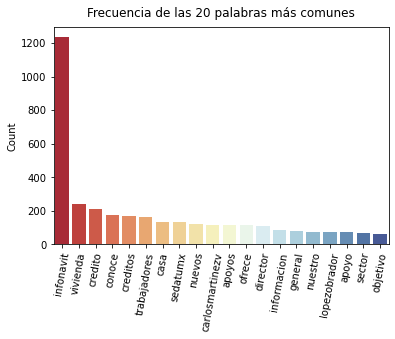

In [37]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0],y=most_common_20[:, 1].astype('int'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

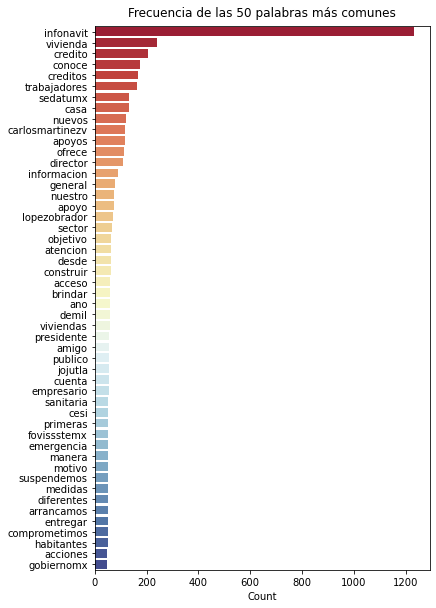

In [15]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_50[:, 1].astype('int'), y=most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [38]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('ofrece', 'infonavit'): 113, ('conoce', 'nuevos'): 111, ('nuevos', 'apoyos'): 111, ('apoyos', 'trabajadores'): 59, ('trabajadores', 'ofrece'): 59, ('infonavit', 'objetivo'): 59, ('objetivo', 'brindar'): 59, ('brindar', 'acceso'): 59, ('director', 'general'): 57, ('amigo', 'empresario'): 52, ...})

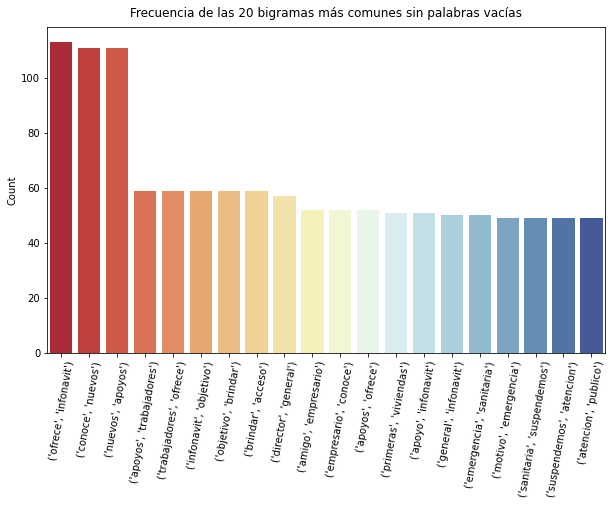

In [39]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [40]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

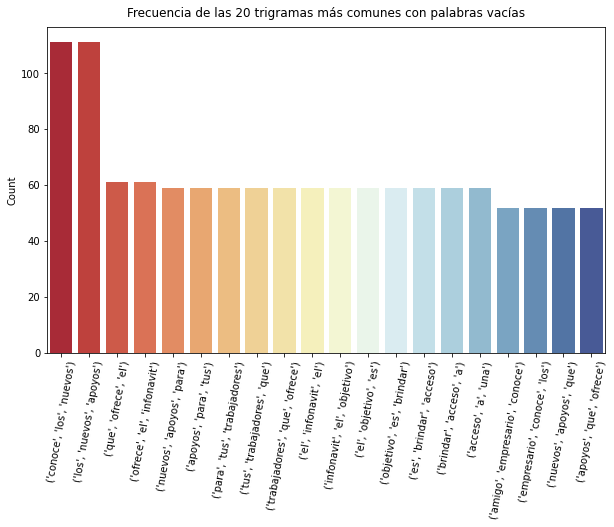

In [41]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

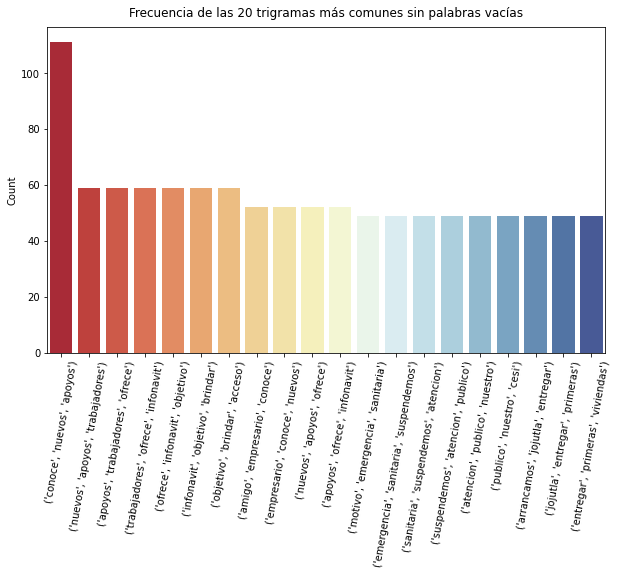

In [60]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [42]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

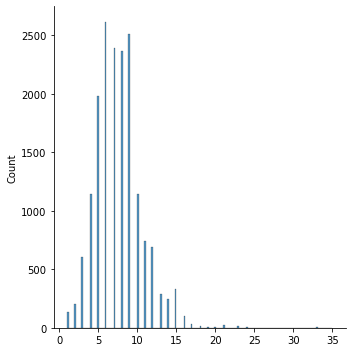

In [43]:
sns.displot(word_lengths, kde=False);

In [44]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

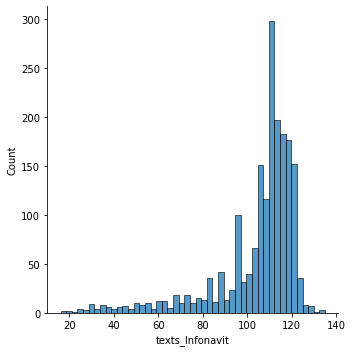

In [45]:
sns.displot(sentence_lengths, kde=False);

In [46]:
num_of_words = grouped_by_title.str.split(' ').str.len()

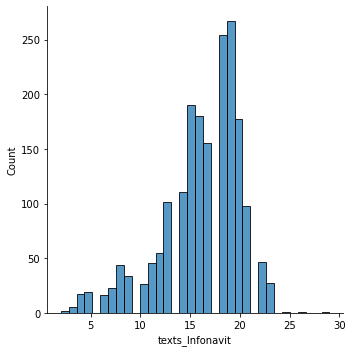

In [47]:
sns.displot(num_of_words, kde=False);

Para terminar, vamos a hacer una nube de palabras utilizando la librería `wordcloud`.

In [48]:
from wordcloud import WordCloud

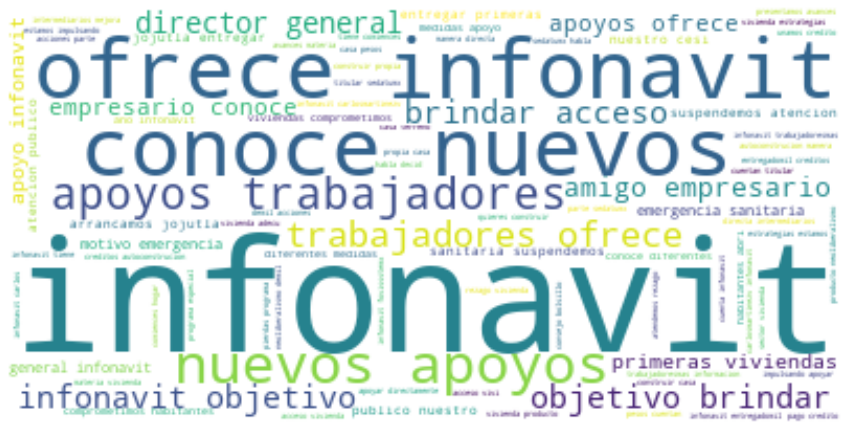

In [49]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
tweets_Infonavit_clean = pd.DataFrame(all_words_except_stop_words, columns = ['texto'])
tweets_Infonavit_clean

,texto
0,conferenciapresidenteel
1,director
2,infonavitcarlos
3,refirio
4,duranteel
...,...
17606,autorizados
17607,hacer
17608,valido
17609,saldo
